<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/M3_lab54_word_vector_rev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단어벡터 (Word Vector or Wrod Embedding)
- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)
- 앞에서의 텍스트 코딩 방식인 One-hot encoding, BoW(단어모음), 문서-단어 행렬 방식은 모두 단어마다 고유번호를 배정하여 사용함. 그러나 이 번호들에는 아무런 의미가 포함되어 있지 않고 단지 인덱스 역할만.
- 대신에 단어를 의미있는 숫자들의 집합, 즉, 벡터로 표현하는 방법이 소개됨 - 단어벡터 (Word Vector)

### Word Vector(단어벡터)
- 단어를 고차원 공간상의 벡터로 표현함으로 단어간 거리 표현 가능. 차원이 높을수록 정교한 의미 구분 가능.
- 보통 50~300 개 정도의 차원을 사용함
- 단어간의 거리 (유사도) 뿐 아니라 방향성(벡터)도 찾을 수 있음.
- 단어벡터의 각 성분이 어떤 의미를 갖는지는 알 수 없다.
*****************

# 한국어 뉴스를 이용한 단어 벡터 생성
- 단어 추출: konlpy 의 kkma() 사용
- 단어 벡터 생성: gensim 의 word2vec() 사용

In [1]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 46.2 MB/s eta 0:00:00


In [ ]:
# gensim: library for topic modelling, document indexing and similarity retrieval
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from konlpy.tag import Kkma     # 형태소 분석 및 자연어 처리 모듈 (서울대)
from gensim.models.word2vec import Word2Vec
kkma = Kkma()

In [3]:
# KoNLPy: 형태소 (뜻을 가진 최소 언어 단위) 분석
# kkma: Korean morpheme analyzer
# https://konlpy.org/ko/latest/morph/#pos-tagging-with-konlpy
print(kkma.sentences('네, 안녕하세요. 반갑습니다.'))
print(kkma.nouns('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))
print(kkma.pos('오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))
# pos (part-of-speech): 품사 (명사, 동사, ...)

['네, 안녕하세요.', '반갑습니다.']
['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']
[('오류', 'NNG'), ('보고', 'NNG'), ('는', 'JX'), ('실행', 'NNG'), ('환경', 'NNG'), (',', 'SP'), ('에러', 'NNG'), ('메세지', 'NNG'), ('와', 'JKM'), ('함께', 'MAG'), ('설명', 'NNG'), ('을', 'JKO'), ('최대한', 'NNG'), ('상세히', 'MAG'), ('!', 'SF'), ('^^', 'EMO')]


## IT 뉴스기사

In [4]:
!wget https://bit.ly/2X7UON2 -O news2018.xlsx   # wget 도 동일

--2023-09-07 06:58:49--  https://bit.ly/2X7UON2
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx [following]
--2023-09-07 06:58:49--  https://www.dropbox.com/s/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx [following]
--2023-09-07 06:58:50--  https://www.dropbox.com/s/raw/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb8fbefae731d5161bf6f96be98.dl.dropboxuserconte

In [6]:
import pandas as pd
news = pd.read_excel("news2018.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
news.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출,본문,URL,분석제외 여부
0,1.500401e+06,20190228,국제신문,김태경 기자 tgkim@kookje.co.kr,빅딜이냐 스몰딜이냐 ‘영변 핵+α’ 로드맵 도출이 관건,정치>북한,정치>외교,NaN,NaN,NaN,NaN,"김,도널드 트럼프,김의겸,김정은","북미,미국,하노이,서울,싱가포르,북한,리비아","북미,북미 정상회,미국,청와대,북미 정상회담,북한,국무위","빅딜,스몰딜,영변,로드맵,도출,비핵화,수준,상응,조치,막판,양국,협상팀,밀당,1차,...","북미,비핵화,미국,스몰딜,1차,정상회담,김정은,종전선언,연락사무소,하노이,영변,대변...",- 비핵화 수준 상응 조치 놓고\n- 양국 협상팀 막판까지 ‘밀당’\n- 1차 때와...,http://www.kookje.co.kr/news2011/asp/newsbody....,NaN
1,1.200201e+06,20190228,경인일보,조영상,"하노이 도착후 실무대표단 청취 김정은, 북미회담 성공 '잰걸음'",국제>국제일반,정치>북한,NaN,NaN,NaN,NaN,김,"북미,하노이,베트남","조선중앙통신,국무위","하노이,도착,실무대표단,청취,김정은,잰걸음,북미회담,성공,김정은,국무,위원장,시작,...","실무대표단,하노이,김정은,위원장,베트남,북미정상회담,북미회담,정상회담,조선중앙통신,...",김정은 국무위원장이 27일 시작되는 제2차 북미정상회담 성공을 위해 심혈을 기울이고...,http://www.kyeongin.com/main/view.php?key=2019...,NaN
2,1.200101e+06,20190228,경기일보,강해인 기자,트럼프-김정은 '2차 핵담판',정치>북한,정치>청와대,정치>외교,NaN,NaN,NaN,"김,도널드 트럼프,마이크 폼페이오,믹 멀베이니,김영철,리용호,김정은,트럼프","금강산,카펠라,미국,하노이,일본,중국,싱가포르,북한,베트남,러시아","북미,미국,외무상,종전선언ㆍ평화협정,경기일보,노동당,윈-윈,플러스 알파,트위터,한국...","트럼프,김정은,2차,핵담판,북미,정상,단독회담,정상,만찬,역사,창조,도출,북측,폐기...","위원장,영변,김정은,비핵화,합의문,미국,베트남,8개월,단독회담,하노이,금강산관광,체...",북미가 처음으로 정상 간 단독회담과 만찬을 가지며 또다시 새로운 역사 창조에 나섰다...,www.kyeonggi.com/news/articleView.html?idxno=2...,NaN
3,1.600501e+06,20190228,무등일보,류성훈,(약수터)평양 냉면과 로저스,정치>북한,정치>외교,정치>청와대,NaN,NaN,NaN,"짐 로저스,도널드 트럼프,리선권,김정은,로저스,트럼프","한반도,평양,미국,일본,약수터,한국,북한","남한,옥류관,조국평화통일위,자유한국당,SK,남북결합,LG,북한,삼성,국무위,개성공단...","약수터,평양,냉면,로저스,9월,남북정상회담,리선권,북한,조국,평화,통일,위원장,냉면...","개성공단,로저스,리선권,위원장,김정은,남북정상회담,지하자원,민족끼리,남한,투자가,대...",지난해 9월 남북정상회담 당시 리선권 북한 조국평화통일위원장의 '냉면' 발언으로 정...,http://www.honam.co.kr/news_view.php?n=577616&...,NaN
4,2.100501e+06,20190228,파이낸셜뉴스,파이낸셜뉴스,북미회담 뒤 남북교류 확대 예고 협력 법안들 다시 주목,정치>행정_자치,정치>국회_정당,정치>북한,NaN,NaN,NaN,"원혜영,김,임종성,박정,김재경,노웅래,김정우,소병훈","평양,하노이,판문점,남,북한,남북한","미국,민주당,더불어민주당,9.19,국회,남북교류,북한,방송통신위원회,과학기술정보통신...","북미회담,예고,남북교류,확대,협력,법안,주목,지자체,민간,교류,활성화,부처,논의,예...","개정안,협력사업,남북교류,활성화,지자체,더불어민주당,부처간,협의체,남북한,2차,남북...","지자체 민간 교류 활성화 대부분 \n여, 부처간 논의 예산 지원 확대 \n야, 사업...",http://www.fnnews.com/news/201902271720367713,NaN


In [8]:
news["본문"][:4]

0    - 비핵화 수준 상응 조치 놓고\n- 양국 협상팀 막판까지 ‘밀당’\n- 1차 때와...
1    김정은 국무위원장이 27일 시작되는 제2차 북미정상회담 성공을 위해 심혈을 기울이고...
2    북미가 처음으로 정상 간 단독회담과 만찬을 가지며 또다시 새로운 역사 창조에 나섰다...
3    지난해 9월 남북정상회담 당시 리선권 북한 조국평화통일위원장의 '냉면' 발언으로 정...
Name: 본문, dtype: object

In [9]:
sentence_list = []
for sent in news["본문"]:

    ## 명사만 추출
    sent_kkma_pos = kkma.nouns(sent)
    word_list = []
    for word_pos in sent_kkma_pos:
        word_list.append(word_pos)

    sentence_list.append(word_list)


In [11]:
print(sentence_list[0])

['비핵화', '수준', '상응', '조치', '양국', '협상', '협상팀', '팀', '막판', '당', '1', '1차', '차', '때', '시간', '조율', '단계적', '접근', '동의', '예상', '종전', '종전선언', '선언', '연락', '연락사무소', '사무소', '개설', '등', '조건', '조건부', '부', '제재', '완화', '명시', '가능성', '북미', '북미회담', '회담', '빅딜', '성공', '김', '김정은', '정은', '답방', '결과', '연관', '북한', '국무', '국무위원장', '위원장', '도', '도널드', '널드', '트럼프', '미국', '대통령', '27', '27일', '일', '친교', '만찬']


In [12]:
news.shape

(1543, 19)

In [13]:
len(sentence_list)

1543

In [14]:
[len(w) for w in sentence_list][:10]

[61, 50, 63, 48, 44, 38, 38, 60, 52, 39]

In [16]:
print(sentence_list[0])

['비핵화', '수준', '상응', '조치', '양국', '협상', '협상팀', '팀', '막판', '당', '1', '1차', '차', '때', '시간', '조율', '단계적', '접근', '동의', '예상', '종전', '종전선언', '선언', '연락', '연락사무소', '사무소', '개설', '등', '조건', '조건부', '부', '제재', '완화', '명시', '가능성', '북미', '북미회담', '회담', '빅딜', '성공', '김', '김정은', '정은', '답방', '결과', '연관', '북한', '국무', '국무위원장', '위원장', '도', '도널드', '널드', '트럼프', '미국', '대통령', '27', '27일', '일', '친교', '만찬']


- word2vec(): Its input is a text corpus and its output is a set of vectors.
- Word embedding via word2vec can make natural language computer-readable, then further implementation of mathematical operations on words can be used to detect their similarities. A well-trained set of word vectors will place similar words close to each other in that space. For instance, the words women, men, and human might cluster in one corner, while yellow, red and blue cluster together in another
- Word2Vec의 기본 가정은 유사한 컨텍스트를 공유하는 두 단어도 유사한 의미를 공유하고 결과적으로 모델에서 유사한 벡터 표현을 공유한다는 것입니다. 예를 들어 : "dog", "puppy"및 "pup"은 "good", "fluffy"또는 "cute"와 같은 유사한 주변 단어와 함께 유사한 상황에서 자주 사용되며 따라서 Word2Vec에 따르면 유사한 벡터 표현을 공유합니다. .

이 가정에서 Word2Vec을 사용하여 데이터 세트에서 단어 간의 관계를 알아 내고, 단어 간의 유사성을 계산하거나, 텍스트 분류 또는 클러스터링과 같은 다른 응용 프로그램의 입력으로 해당 단어의 벡터 표현을 사용할 수 있습니다.

## 연습

In [ ]:

# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1, vector_size=5)

In [20]:
# summarize the loaded model
print(model)

Word2Vec<vocab=14, vector_size=5, alpha=0.025>


In [23]:
# summarize vocabulary (to see learned vocabulary of tokens (words) )
words = list(model.wv.index_to_key)
print(words)

['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']


In [25]:
# access vector for one word
print(model.wv['sentence'])

[-0.01072454  0.00472863  0.10206699  0.18018547 -0.186059  ]


In [26]:
# save model
model.save('model.bin')

In [27]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=14, vector_size=5, alpha=0.025>


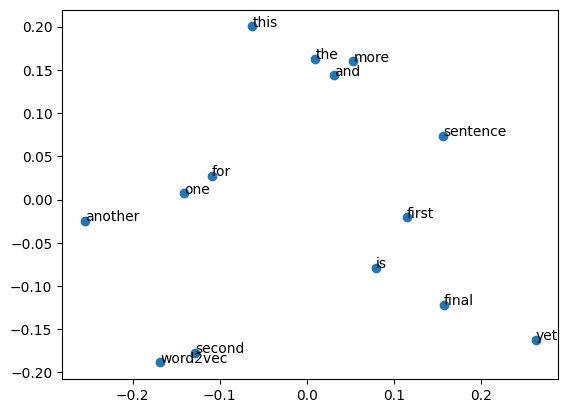

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Get back to the problem

In [31]:
model = Word2Vec(sentence_list, vector_size=100)

In [32]:
model.wv['한국']

array([-0.12699622,  0.59579605, -0.07033091,  0.06987878, -0.07345244,
       -0.81273377,  0.4154471 ,  0.64612013, -0.44586658,  0.19697982,
       -0.72191185, -0.6685938 , -0.5456885 ,  0.01236059, -0.30255842,
       -0.57392293, -0.4195777 , -0.56584626, -0.4414147 , -0.39633605,
        0.16577667,  0.38547763,  0.82971776, -0.1830919 , -0.33771002,
       -0.19702029, -0.37571347, -0.3307086 , -0.32883447,  0.5537997 ,
        0.46144757,  0.12035506,  0.37151185, -0.03932431, -0.05518433,
        0.28550637, -0.35847184, -0.4237728 ,  0.07070673, -1.0187107 ,
       -0.26821196, -0.7401414 ,  0.1814586 , -0.14213106,  0.13126417,
       -0.23983924,  0.32240546, -0.470873  , -0.00644097,  0.4002629 ,
       -0.08684837, -0.12330076,  0.00102008, -0.21661995,  0.10793352,
        0.25376445,  0.07957822,  0.08292716, -0.7747408 , -0.09268831,
        0.02460555,  0.3685328 , -0.6214074 , -0.58037007, -0.28984654,
        0.42837322,  0.36994955,  0.2206457 , -0.4153822 ,  0.62

In [33]:
model.wv.most_similar("한국")   # cosine similarity

[('자유', 0.9977835416793823),
 ('당', 0.9928512573242188),
 ('자유한국', 0.9859552979469299),
 ('민주당', 0.981542706489563),
 ('자유한국당', 0.9810755848884583),
 ('대표', 0.9786375164985657),
 ('원내', 0.9728986024856567),
 ('원내대표', 0.970809817314148),
 ('경원', 0.968938410282135),
 ('홍영표', 0.9619216322898865)]

In [34]:
print(model.wv.similarity("미국","미국"))
print(model.wv.similarity("트럼프", "일본"))
print(model.wv.similarity("트럼프","대통령"))

0.99999994
0.5415694
0.97952706


## 문장 유사도
- NLTK (Natural Language ToolKit) 라이브러리 사용

In [35]:
!pip install nltk

In [36]:
# simple exercise
import nltk
nltk.download('punkt')
sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [37]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

In [38]:
# edit_distance: 문자열이 얼마나 다른지 편집거리를 이용해 유사도 판단
import nltk
sentence_list = ["우리 모두 함께 놀자",
                 "모두 같이 놀자",
                 "놀자",
                 "모두 다 같이"]

for i in sentence_list:
    print("'", i, "'")
    for j in sentence_list:
        print("\t", j, " : ", end='')
        print(nltk.edit_distance(i, j), )
    print()

' 우리 모두 함께 놀자 '
	 우리 모두 함께 놀자  : 0
	 모두 같이 놀자  : 5
	 놀자  : 9
	 모두 다 같이  : 7

' 모두 같이 놀자 '
	 우리 모두 함께 놀자  : 5
	 모두 같이 놀자  : 0
	 놀자  : 6
	 모두 다 같이  : 4

' 놀자 '
	 우리 모두 함께 놀자  : 9
	 모두 같이 놀자  : 6
	 놀자  : 0
	 모두 다 같이  : 7

' 모두 다 같이 '
	 우리 모두 함께 놀자  : 7
	 모두 같이 놀자  : 4
	 놀자  : 7
	 모두 다 같이  : 0



- 단어벡터와 코사인 유사도 사용
- ![image.png](attachment:image.png)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

sentence_list = ['우리 모두 함께 놀자',
                 '모두 같이 놀자']

tfidf = TfidfVectorizer()
tfidf_vec = tfidf.fit_transform(sentence_list)

count = CountVectorizer()
count_vec = count.fit_transform(sentence_list)

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

tfidf_cosine = cosine_similarity(tfidf_vec[0].toarray(), tfidf_vec[1].toarray())[0][0]
count_cosine = cosine_similarity(count_vec[0].toarray(), count_vec[1].toarray())[0][0]

print("tfidf consine similarity : ", tfidf_cosine)
print("coiunt consine similarity : ", count_cosine)

tfidf consine similarity :  0.4112070550676187
coiunt consine similarity :  0.5773502691896258


In [42]:
# 직접 구현시 코사인 유사도
import math
def my_cosine_similarity(v1,v2):

    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

my_tfidf = my_cosine_similarity(tfidf_vec.toarray()[0], tfidf_vec.toarray()[1])
my_count = my_cosine_similarity(count_vec.toarray()[0], count_vec.toarray()[1])

print("my tfidf consine similarity : ", my_tfidf)
print("my coiunt consine similarity : ", my_count)

my tfidf consine similarity :  0.4112070550676187
my coiunt consine similarity :  0.5773502691896258


In [44]:
# 자카드 유사도 계산

sentence_list = ['우리 모두 함께 놀자','모두 같이 놀자']
def get_jaccard_sim(str1, str2):
    a = set(str1.split())
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

get_jaccard_sim(sentence_list[0], sentence_list[1])

0.4